In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
df = pd.read_csv('C:/Users/CSD/Desktop/data_1.csv')

In [50]:
df.head()

,Date,Mobility,New infection,New dead,Stringency index
0,2020-02-17,-7.333,1,0,31.48
1,2020-02-18,-5.750,1,0,31.48
2,2020-02-19,-5.600,0,0,31.48
3,2020-02-20,-5.833,73,1,31.48
4,2020-02-21,-7.143,100,1,45.37


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563 entries, 0 to 562
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              563 non-null    object 
 1   Mobility          563 non-null    float64
 2   New infection     563 non-null    int64  
 3   New dead          563 non-null    int64  
 4   Stringency index  563 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 22.1+ KB


In [52]:
# Date가 string(object) 형식으로 존재 -> Datetime 으로 변경해서 column으로 저장
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df['date'] = pd.to_datetime(df['Date']) # 추후 다른 활용을 위해 하나 더 만들어놓기
df.set_index('Date', inplace=True) 
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 563 entries, 2020-02-17 to 2021-09-01
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Mobility          563 non-null    float64       
 1   New infection     563 non-null    int64         
 2   New dead          563 non-null    int64         
 3   Stringency index  563 non-null    float64       
 4   date              563 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 26.4 KB


In [53]:
df.head() # Date column을 index행으로 바꿔주면 Date에 있는 값들이 굵게 표시됨.

,Mobility,New infection,New dead,Stringency index,date
Date,,,,,
2020-02-17,-7.333,1,0,31.48,2020-02-17
2020-02-18,-5.750,1,0,31.48,2020-02-18
2020-02-19,-5.600,0,0,31.48,2020-02-19
2020-02-20,-5.833,73,1,31.48,2020-02-20
2020-02-21,-7.143,100,1,45.37,2020-02-21


In [10]:
df.resample(rule = 'A')

In [11]:
df.resample(rule = 'A').mean()

,Mobility,New infection,New dead,Stringency index
Date,,,,
2020-12-31,-12.848906,193.54232,2.874608,55.261034
2021-12-31,-2.496512,793.57377,5.680328,54.985574


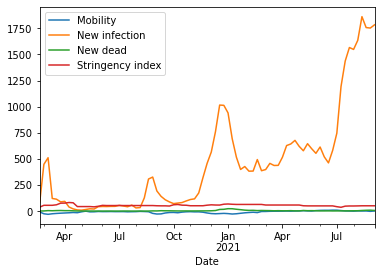

In [12]:
df.resample(rule = 'W').mean().plot()

In [15]:
df.isna().sum()
df.isnull() #True/False in dataframe
df.isnull().sum() #num of NaN in each column
df.isnull().sum().sum() #total num of NaN

0

In [16]:
df.index

DatetimeIndex(['2020-02-17', '2020-02-18', '2020-02-19', '2020-02-20',
               '2020-02-21', '2020-02-22', '2020-02-23', '2020-02-24',
               '2020-02-25', '2020-02-26',
               ...
               '2021-08-23', '2021-08-24', '2021-08-25', '2021-08-26',
               '2021-08-27', '2021-08-28', '2021-08-29', '2021-08-30',
               '2021-08-31', '2021-09-01'],
              dtype='datetime64[ns]', name='Date', length=563, freq=None)

In [20]:
df.asfreq('H').isnull().sum() #빈도를 시간으로 설정하면 NaN으로 채워진 새로운 행들이 생기는데 그 개수를 출력
df = df.asfreq('H', method = 'ffill') #결측치를 채우는 방법 bfill(뒤의 데이터를 그대로 가져옴) / ffill(앞의 데이터를 그대로 가져옴)
df.isnull().sum() #다시 결측치 확인해보면 0개가 됨.

Mobility            0
New infection       0
New dead            0
Stringency index    0
dtype: int64

In [21]:
df.index

DatetimeIndex(['2020-02-17 00:00:00', '2020-02-17 01:00:00',
               '2020-02-17 02:00:00', '2020-02-17 03:00:00',
               '2020-02-17 04:00:00', '2020-02-17 05:00:00',
               '2020-02-17 06:00:00', '2020-02-17 07:00:00',
               '2020-02-17 08:00:00', '2020-02-17 09:00:00',
               ...
               '2021-08-31 15:00:00', '2021-08-31 16:00:00',
               '2021-08-31 17:00:00', '2021-08-31 18:00:00',
               '2021-08-31 19:00:00', '2021-08-31 20:00:00',
               '2021-08-31 21:00:00', '2021-08-31 22:00:00',
               '2021-08-31 23:00:00', '2021-09-01 00:00:00'],
              dtype='datetime64[ns]', name='Date', length=13489, freq='H')

In [29]:
df.asfreq('D').isnull().sum()
df = df.asfreq('D')
df.index

DatetimeIndex(['2020-02-17', '2020-02-18', '2020-02-19', '2020-02-20',
               '2020-02-21', '2020-02-22', '2020-02-23', '2020-02-24',
               '2020-02-25', '2020-02-26',
               ...
               '2021-08-23', '2021-08-24', '2021-08-25', '2021-08-26',
               '2021-08-27', '2021-08-28', '2021-08-29', '2021-08-30',
               '2021-08-31', '2021-09-01'],
              dtype='datetime64[ns]', name='Date', length=563, freq='D')

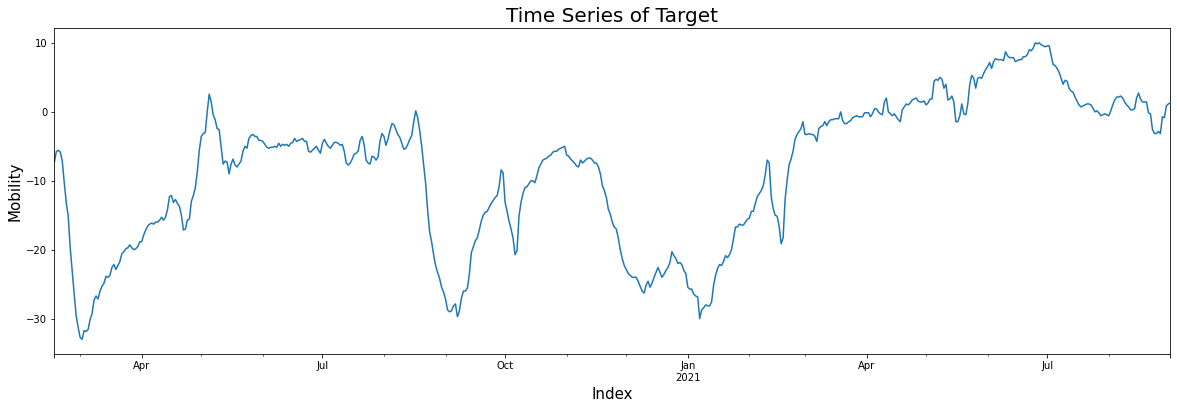

In [30]:
df['Mobility'].plot(figsize = (20, 6))
plt.title('Time Series of Target', fontsize = 20)
plt.xlabel('Index', fontsize = 15)
plt.ylabel('Mobility', fontsize = 15)
plt.show()

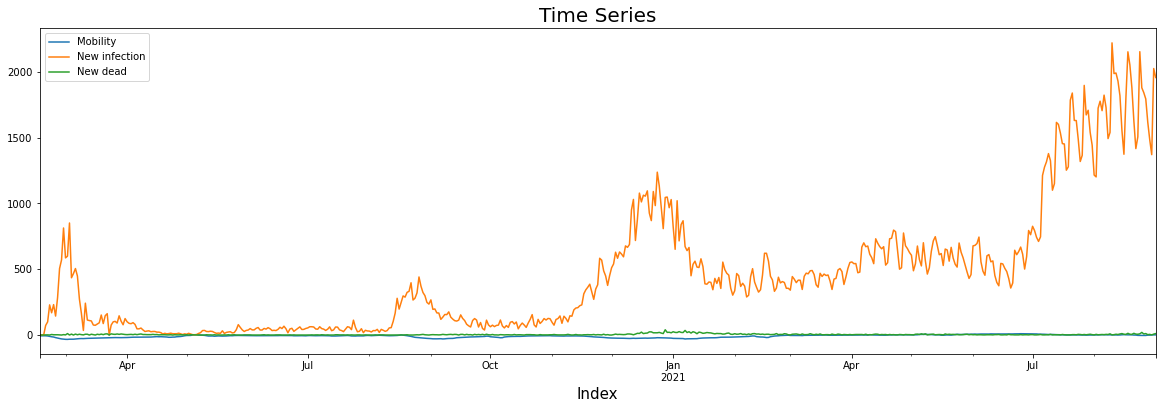

In [54]:
df[['Mobility', 'New infection', 'New dead']].plot(figsize = (20, 6))
plt.title('Time Series', fontsize = 20)
plt.xlabel('Index', fontsize = 15)
plt.show()

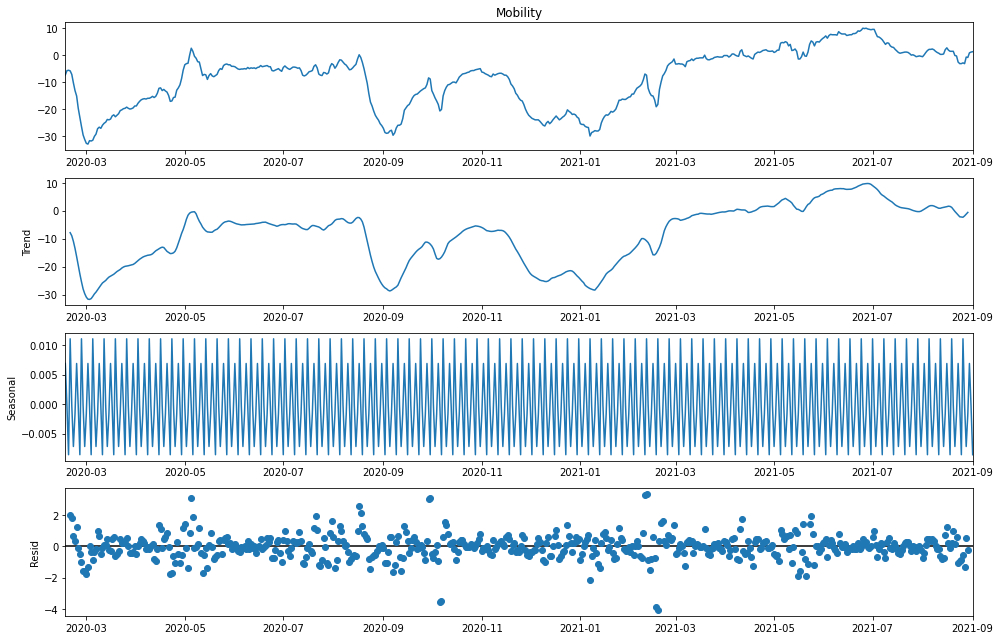

In [55]:
import statsmodels.api as sm
plt.rcParams['figure.figsize'] = (14, 9)
sm.tsa.seasonal_decompose(df['Mobility'], model = 'additive').plot()
plt.show()

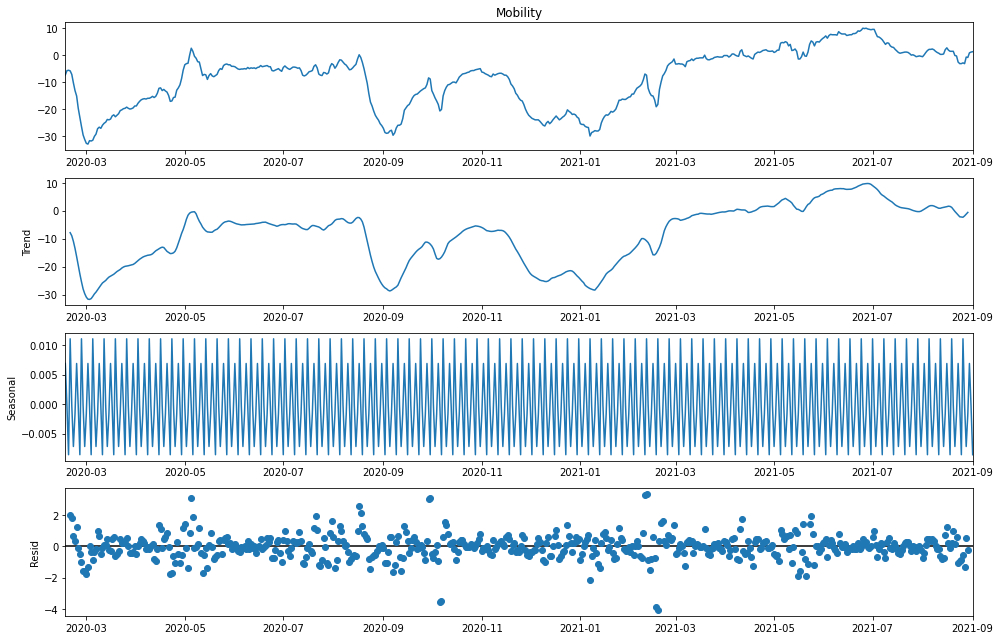

seasonal    0
dtype: int64

In [56]:
result = sm.tsa.seasonal_decompose(df['Mobility'], model = 'additive')
Y_trend = pd.DataFrame(result.trend)
Y_trend.isnull().sum()
Y_seasonal = pd.DataFrame(result.seasonal)
Y_seasonal.isnull().sum()

In [57]:
Y_trend.fillna(method = 'bfill', inplace = True)
Y_trend.fillna(method = 'ffill', inplace = True)
Y_trend.columns = ['mobility_trend']
Y_trend.iloc[:20, :]
Y_seasonal.fillna(method = 'bfill', inplace = True)
Y_seasonal.fillna(method = 'ffill', inplace = True)
Y_seasonal.columns = ['mobility_seasonal']
Y_seasonal.iloc[:20, :]

,mobility_seasonal
Date,
2020-02-17,0.006898
2020-02-18,-0.000361
2020-02-19,-0.008569
2020-02-20,0.011084
2020-02-21,-0.000229
2020-02-22,-0.007175
2020-02-23,-0.001647
2020-02-24,0.006898
2020-02-25,-0.000361


In [58]:
if 'mobility_trend' not in df.columns:
    if 'mobility_seasonal' not in df.columns:
        df = pd.concat([df, Y_trend, Y_seasonal], axis = 1)
df

,Mobility,New infection,New dead,Stringency index,date,mobility_trend,mobility_seasonal
Date,,,,,,,
2020-02-17,-7.333,1,0,31.48,2020-02-17,-7.869714,0.006898
2020-02-18,-5.750,1,0,31.48,2020-02-18,-7.869714,-0.000361
2020-02-19,-5.600,0,0,31.48,2020-02-19,-7.869714,-0.008569
2020-02-20,-5.833,73,1,31.48,2020-02-20,-7.869714,0.011084
2020-02-21,-7.143,100,1,45.37,2020-02-21,-8.985429,-0.000229
...,...,...,...,...,...,...,...
2021-08-28,-0.714,1617,3,50.93,2021-08-28,-1.244857,-0.007175
2021-08-29,-0.857,1483,5,50.93,2021-08-29,-0.612143,-0.001647
2021-08-30,0.857,1370,1,50.93,2021-08-30,-0.612143,0.006898


In [59]:
sm.tsa.seasonal_decompose(df['Mobility'], model = 'multiplicative').plot()
plt.show()

ValueError: Multiplicative seasonality is not appropriate for zero and negative values

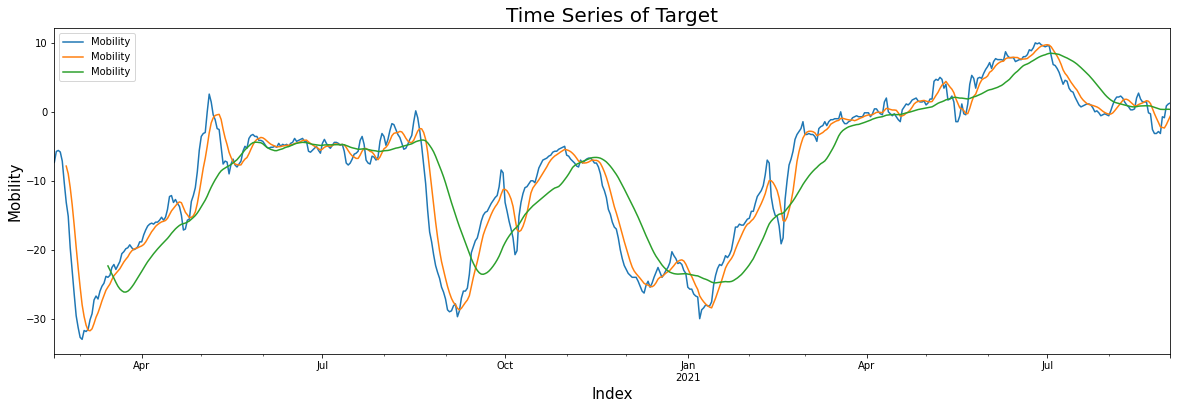

In [60]:
pd.concat([df[['Mobility']], #Day 간격
          df[['Mobility']].rolling(7).mean(), #Week 단위로 묶어 평균낸 것
          df[['Mobility']].rolling(7 * 4).mean()], axis = 1).plot(figsize = (20, 6)) #4주 간격으로 묶어 평균낸 것
plt.title('Time Series of Target', fontsize = 20)
plt.xlabel('Index', fontsize = 15)
plt.ylabel('Mobility', fontsize = 15)
plt.show()

In [61]:
Y_diff = df[['Mobility']].diff() # 시간이 지남에 따라 변하는 Y값에 대해서도 분석할 수 있음.
Y_diff.fillna(method = 'bfill', inplace = True)
Y_diff.fillna(method = 'ffill', inplace = True)
Y_diff.columns = ['mobility_diff']
if 'mobility_diff' not in df.columns:
    df = pd.concat([df, Y_diff], axis = 1)
df

,Mobility,New infection,New dead,Stringency index,date,mobility_trend,mobility_seasonal,mobility_diff
Date,,,,,,,,
2020-02-17,-7.333,1,0,31.48,2020-02-17,-7.869714,0.006898,1.583
2020-02-18,-5.750,1,0,31.48,2020-02-18,-7.869714,-0.000361,1.583
2020-02-19,-5.600,0,0,31.48,2020-02-19,-7.869714,-0.008569,0.150
2020-02-20,-5.833,73,1,31.48,2020-02-20,-7.869714,0.011084,-0.233
2020-02-21,-7.143,100,1,45.37,2020-02-21,-8.985429,-0.000229,-1.310
...,...,...,...,...,...,...,...,...
2021-08-28,-0.714,1617,3,50.93,2021-08-28,-1.244857,-0.007175,2.429
2021-08-29,-0.857,1483,5,50.93,2021-08-29,-0.612143,-0.001647,-0.143
2021-08-30,0.857,1370,1,50.93,2021-08-30,-0.612143,0.006898,1.714


In [62]:
df['stringency_group'] = pd.cut(df['Stringency index'], 10) # 카테고리형 변수 만들기
df['stringency_group'].dtype

CategoricalDtype(categories=[(31.429, 36.573], (36.573, 41.666], (41.666, 46.759], (46.759, 51.852], (51.852, 56.945], (56.945, 62.038], (62.038, 67.131], (67.131, 72.224], (72.224, 77.317], (77.317, 82.41]],
              ordered=True)

In [64]:
# datetime 데이터 타입에서 세부시간 추출하는 방법
df['Year'] = df.date.dt.year
df['Quarter'] = df.date.dt.quarter
df['Quarter_ver2'] = df['Quarter'] + (df.Year - df.Year.min()) * 4
df['Month'] = df.date.dt.month
df['Day'] = df.date.dt.day
df['Hour'] = df.date.dt.hour
df['DayofWeek'] = df.date.dt.dayofweek
df

,Mobility,New infection,New dead,Stringency index,date,mobility_trend,mobility_seasonal,mobility_diff,stringency_group,Year,Quarter,Quarter_ver2,Month,Day,Hour,DayofWeek
Date,,,,,,,,,,,,,,,,
2020-02-17,-7.333,1,0,31.48,2020-02-17,-7.869714,0.006898,1.583,"(31.429, 36.573]",2020,1,1,2,17,0,0
2020-02-18,-5.750,1,0,31.48,2020-02-18,-7.869714,-0.000361,1.583,"(31.429, 36.573]",2020,1,1,2,18,0,1
2020-02-19,-5.600,0,0,31.48,2020-02-19,-7.869714,-0.008569,0.150,"(31.429, 36.573]",2020,1,1,2,19,0,2
2020-02-20,-5.833,73,1,31.48,2020-02-20,-7.869714,0.011084,-0.233,"(31.429, 36.573]",2020,1,1,2,20,0,3
2020-02-21,-7.143,100,1,45.37,2020-02-21,-8.985429,-0.000229,-1.310,"(41.666, 46.759]",2020,1,1,2,21,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-28,-0.714,1617,3,50.93,2021-08-28,-1.244857,-0.007175,2.429,"(46.759, 51.852]",2021,3,7,8,28,0,5
2021-08-29,-0.857,1483,5,50.93,2021-08-29,-0.612143,-0.001647,-0.143,"(46.759, 51.852]",2021,3,7,8,29,0,6
2021-08-30,0.857,1370,1,50.93,2021-08-30,-0.612143,0.006898,1.714,"(46.759, 51.852]",2021,3,7,8,30,0,0


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 563 entries, 2020-02-17 to 2021-09-01
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Mobility           563 non-null    float64       
 1   New infection      563 non-null    int64         
 2   New dead           563 non-null    int64         
 3   Stringency index   563 non-null    float64       
 4   date               563 non-null    datetime64[ns]
 5   mobility_trend     563 non-null    float64       
 6   mobility_seasonal  563 non-null    float64       
 7   mobility_diff      563 non-null    float64       
 8   stringency_group   563 non-null    category      
 9   Year               563 non-null    int64         
 10  Quarter            563 non-null    int64         
 11  Quarter_ver2       563 non-null    int64         
 12  Month              563 non-null    int64         
 13  Day                563 non-null    int64      

In [66]:
df['mobility_lag1'] = df['Mobility'].shift(1) # 데이터 뒤로 밀기, 밀린 개수만큼 NaN으로 채워지므로 결측치 처리 해줘야함.
df['mobility_lag2'] = df['Mobility'].shift(2)
df['mobility_lag1'].fillna(method = 'bfill', inplace = True)
df['mobility_lag2'].fillna(method = 'bfill', inplace = True)
df

,Mobility,New infection,New dead,Stringency index,date,mobility_trend,mobility_seasonal,mobility_diff,stringency_group,Year,Quarter,Quarter_ver2,Month,Day,Hour,DayofWeek,mobility_lag1,mobility_lag2
Date,,,,,,,,,,,,,,,,,,
2020-02-17,-7.333,1,0,31.48,2020-02-17,-7.869714,0.006898,1.583,"(31.429, 36.573]",2020,1,1,2,17,0,0,-7.333,-7.333
2020-02-18,-5.750,1,0,31.48,2020-02-18,-7.869714,-0.000361,1.583,"(31.429, 36.573]",2020,1,1,2,18,0,1,-7.333,-7.333
2020-02-19,-5.600,0,0,31.48,2020-02-19,-7.869714,-0.008569,0.150,"(31.429, 36.573]",2020,1,1,2,19,0,2,-5.750,-7.333
2020-02-20,-5.833,73,1,31.48,2020-02-20,-7.869714,0.011084,-0.233,"(31.429, 36.573]",2020,1,1,2,20,0,3,-5.600,-5.750
2020-02-21,-7.143,100,1,45.37,2020-02-21,-8.985429,-0.000229,-1.310,"(41.666, 46.759]",2020,1,1,2,21,0,4,-5.833,-5.600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-28,-0.714,1617,3,50.93,2021-08-28,-1.244857,-0.007175,2.429,"(46.759, 51.852]",2021,3,7,8,28,0,5,-3.143,-2.857
2021-08-29,-0.857,1483,5,50.93,2021-08-29,-0.612143,-0.001647,-0.143,"(46.759, 51.852]",2021,3,7,8,29,0,6,-0.714,-3.143
2021-08-30,0.857,1370,1,50.93,2021-08-30,-0.612143,0.006898,1.714,"(46.759, 51.852]",2021,3,7,8,30,0,0,-0.857,-0.714


In [67]:
# 카테고리형 변수를 그대로 숫자로 인식하면 예측 성능이 떨어지므로 one-hot encoding 으로 표현해줘야함.
pd.get_dummies(df['Quarter'])

,1,2,3,4
Date,,,,
2020-02-17,1,0,0,0
2020-02-18,1,0,0,0
2020-02-19,1,0,0,0
2020-02-20,1,0,0,0
2020-02-21,1,0,0,0
...,...,...,...,...
2021-08-28,0,0,1,0
2021-08-29,0,0,1,0
2021-08-30,0,0,1,0


In [68]:
if 'Quarter' in df.columns:
    df = pd.concat([df, pd.get_dummies(df['Quarter'], prefix = 'Quarter_Dummy', drop_first = True)], axis = 1)
    del df['Quarter']
df

,Mobility,New infection,New dead,Stringency index,date,mobility_trend,mobility_seasonal,mobility_diff,stringency_group,Year,Quarter_ver2,Month,Day,Hour,DayofWeek,mobility_lag1,mobility_lag2,Quarter_Dummy_2,Quarter_Dummy_3,Quarter_Dummy_4
Date,,,,,,,,,,,,,,,,,,,,
2020-02-17,-7.333,1,0,31.48,2020-02-17,-7.869714,0.006898,1.583,"(31.429, 36.573]",2020,1,2,17,0,0,-7.333,-7.333,0,0,0
2020-02-18,-5.750,1,0,31.48,2020-02-18,-7.869714,-0.000361,1.583,"(31.429, 36.573]",2020,1,2,18,0,1,-7.333,-7.333,0,0,0
2020-02-19,-5.600,0,0,31.48,2020-02-19,-7.869714,-0.008569,0.150,"(31.429, 36.573]",2020,1,2,19,0,2,-5.750,-7.333,0,0,0
2020-02-20,-5.833,73,1,31.48,2020-02-20,-7.869714,0.011084,-0.233,"(31.429, 36.573]",2020,1,2,20,0,3,-5.600,-5.750,0,0,0
2020-02-21,-7.143,100,1,45.37,2020-02-21,-8.985429,-0.000229,-1.310,"(41.666, 46.759]",2020,1,2,21,0,4,-5.833,-5.600,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-28,-0.714,1617,3,50.93,2021-08-28,-1.244857,-0.007175,2.429,"(46.759, 51.852]",2021,7,8,28,0,5,-3.143,-2.857,0,1,0
2021-08-29,-0.857,1483,5,50.93,2021-08-29,-0.612143,-0.001647,-0.143,"(46.759, 51.852]",2021,7,8,29,0,6,-0.714,-3.143,0,1,0
2021-08-30,0.857,1370,1,50.93,2021-08-30,-0.612143,0.006898,1.714,"(46.759, 51.852]",2021,7,8,30,0,0,-0.857,-0.714,0,1,0


In [ ]:
# 지금까지의 모든 데이터 전처리 과정을 함수화(https://dsbook.tistory.com/273?category=841791 참고)

def non_feature_engineering(raw):
    raw_nfe = raw.copy()
    if 'Date' in raw_nfe.columns:
        raw_nfe['Date'] = pd.to_datetime(raw_nfe['Date'])
        raw_nfe['date'] = pd.to_datetime(raw_nfe['Date'])
    if raw_nfe.index.dtype == 'int64':
        raw_nfe.set_index('Date', inplace=True) 
    
    raw_nfe = raw_nfe.asfreq('H', method = 'ffill')
    return raw_nfe

def feature_engineering(raw):
    raw_fe = raw.copy()
    if 'Date' in raw_fe.columns:
        raw_fe['Date'] = pd.to_datetime(raw_fe['Date'])
        raw_fe['date'] = pd.to_datetime(raw_fe['Date'])
    if raw_fe.index.dtype == 'int64':
        raw_fe.set_index('Date', inplace = True)
    
    raw_fe = raw_fe.asfreq('H', method = 'ffill')
    
    result = sm.tsa.seasonal_decompose(raw_fe['Mobility'], model = 'additive')
    Y_trend = pd.DataFrame(result.trend)
    Y_trend.fillna(method = 'bfill', inplace = True)
    Y_trend.fillna(method = 'ffill', inplace = True)
    Y_trend.columns = ['mobility_trend']
    Y_seasonal = pd.DataFrame(result.seasonal)
    Y_seasonal.fillna(method = 'bfill', inplace = True)
    Y_seasonal.fillna(method = 'ffill', inplace = True)
    Y_seasonal.columns = ['mobility_seasonal']
    
    pd.concat([raw_fe, Y_trend, Y_seasonal], axis = 1).isnull().sum()
    if 'mobility_trend' not in raw_fe.columns:
        if 'mobility_seasonal' not in raw_fe.columns:
            raw_fe = pd.concat([raw_fe, Y_trend, Y_seasonal], axis = 1)
       
    Y_mobility_Day = raw_fe[['mobility']].rolling(24).mean()
    Y_mobility_Day.fillna(method = 'ffill', inplace = True)
    Y_mobility_Day.fillna(method = 'bfill', inplace = True)
    Y_mobility_Day.columns = ['mobility_Day']
    
    Y_mobility_Week = raw_fe[['mobility']].rolling(24 * 7).mean()
    Y_mobility_Week.fillna(method = 'ffill', inplace = True)
    Y_mobility_Week.fillna(method = 'bfill', inplace = True)
    Y_mobility_Week.columns = ['mobility_Week']
    
    if 'mobility_Day' not in raw_fe.columns:
        raw_fe = pd.concat([raw_fe, Y_mobility_Day], axis = 1)
    if 'mobility_Week' not in raw_fe.columns:
        raw_fe = pd.concat([raw_fe, Y_mobility_Week], axis = 1)
    
    Y_diff = raw_fe[['Mobility']].diff()
    Y_diff.fillna(method = 'bfill', inplace = True)
    Y_diff.fillna(method = 'ffill', inplace = True)
    Y_diff.columns = ['mobility_diff']
    if 'mobility_diff' not in raw_fe.columns:
        raw_fe = pd.concat([raw_fe, Y_diff], axis = 1)
    
    raw_fe['stringency_group'] = pd.cut(raw_fe['Stringency index'], 10)
    raw_fe['Year'] = raw_fe.date.dt.year
    raw_fe['Quarter'] = raw_fe.date.dt.quarter
    raw_fe['Quarter_ver2'] = raw_fe['Quarter'] + (raw_fe.Year - raw_fe.Year.min()) * 4
    raw_fe['Month'] = raw_fe.date.dt.month
    raw_fe['Day'] = raw_fe.date.dt.day
    raw_fe['Hour'] = raw_fe.date.dt.hour
    raw_fe['DayofWeek'] = raw_fe.date.dt.dayofweek
    
    raw_fe['mobility_lag1'] = raw_fe['Mobility'].shift(1)
    raw_fe['mobility_lag2'] = raw_fe['Mobility'].shift(2)
    raw_fe['mobility_lag1'].fillna(method = 'bfill', inplace = True)
    raw_fe['mobility_lag2'].fillna(method = 'bfill', inplace = True)
    
    if 'Quarter' in raw_fe.columns:
        if 'Quarter_Dummy' not in ['_'.join(col.split('_')[:2]) for col in raw_fe.columns]:
            raw_fe = pd.concat([raw_fe, pd.get_dummies(raw_fe['Quarter'], prefix = 'Quarter_Dummy', drop_first = True)], axis = 1)
            del raw_fe['Quarter']
    return raw_fe

In [72]:
# 시각화
df.describe(include = 'all').T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
Mobility,563,NaN,NaN,NaN,NaT,NaT,-8.36226,10.3802,-33,-16.286,-5.714,-0.429,10
New infection,563,NaN,NaN,NaN,NaT,NaT,453.591,484.772,0,63.5,357,617,2219
New dead,563,NaN,NaN,NaN,NaT,NaT,4.09059,5.17357,0,1,2,5,40
Stringency index,563,NaN,NaN,NaN,NaT,NaT,55.1417,8.63303,31.48,50,53.24,58.33,82.41
date,563,563,2020-04-13 00:00:00,1,2020-02-17,2021-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mobility_trend,563,NaN,NaN,NaN,NaT,NaT,-8.3751,10.2445,-31.755,-15.9593,-5.73457,-0.418429,9.73457
mobility_seasonal,563,NaN,NaN,NaN,NaT,NaT,-3.61e-06,0.00653209,-0.00856898,-0.00717537,-0.000361021,0.00689757,0.0110836
mobility_diff,563,NaN,NaN,NaN,NaT,NaT,0.0181208,1.11108,-4.857,-0.429,0,0.571,5.572
stringency_group,563,10,"(46.759, 51.852]",161,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,563,NaN,NaN,NaN,NaT,NaT,2020.43,0.495984,2020,2020,2020,2021,2021


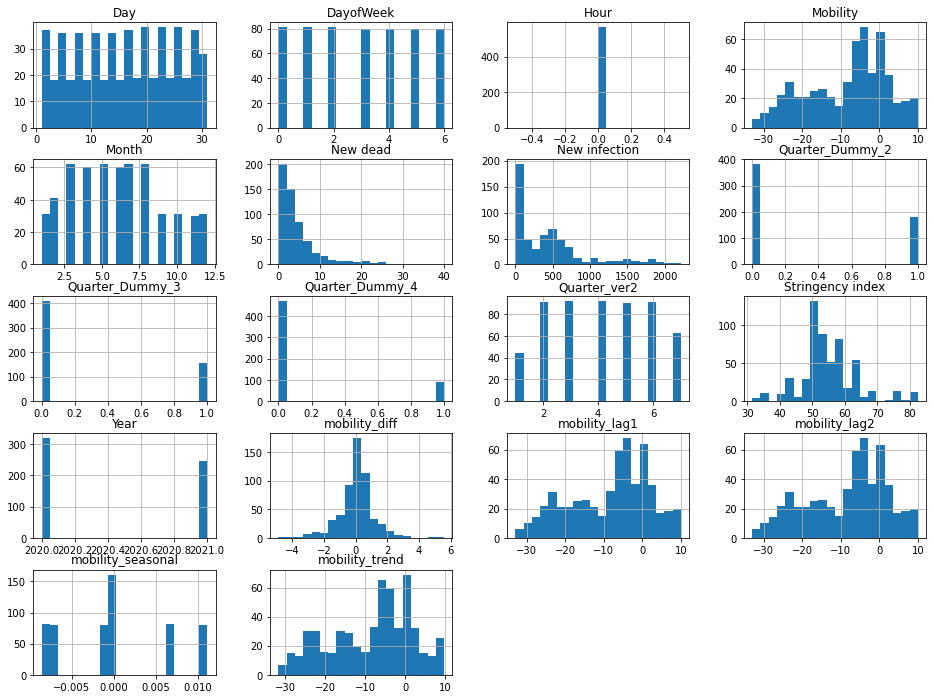

In [73]:
df.hist(bins = 20, grid = True, figsize = (16, 12)) # 히스토그램
plt.show()

C:\Users\CSD\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


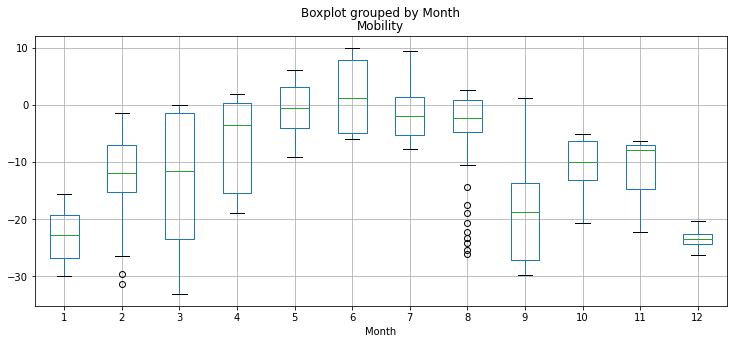

In [77]:
df.boxplot(column = 'Mobility', by = 'Month', grid = True, figsize = (12, 5))
plt.show()

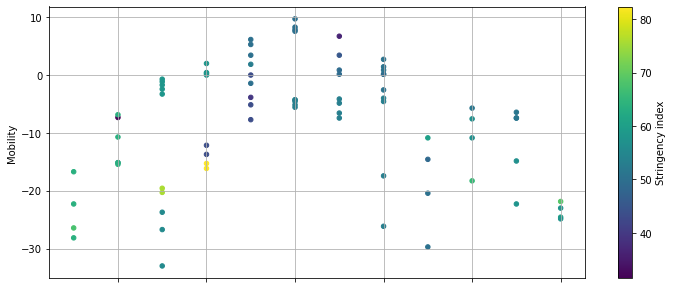

In [79]:
df[df.DayofWeek == 0].plot.scatter(y = 'Mobility', x = 'Month', c = 'Stringency index', grid = True, figsize = (12, 5), colormap = 'viridis')
plt.show()

In [81]:
df.corr().style.background_gradient().set_precision(2)

,Mobility,New infection,New dead,Stringency index,mobility_trend,mobility_seasonal,mobility_diff,Year,Quarter_ver2,Month,Day,Hour,DayofWeek,mobility_lag1,mobility_lag2,Quarter_Dummy_2,Quarter_Dummy_3,Quarter_Dummy_4
Mobility,1.00,0.24,-0.39,-0.45,1.00,-0.00,0.06,0.49,0.54,-0.02,0.03,nan,-0.00,0.99,0.98,0.42,0.13,-0.28
New infection,0.24,1.00,0.34,-0.12,0.25,-0.02,-0.06,0.61,0.75,0.13,0.04,nan,-0.02,0.25,0.26,-0.20,0.32,-0.04
New dead,-0.39,0.34,1.00,0.40,-0.40,0.03,0.04,0.27,0.22,-0.13,0.01,nan,-0.04,-0.40,-0.40,-0.25,-0.17,0.12
Stringency index,-0.45,-0.12,0.40,1.00,-0.45,-0.01,0.06,-0.02,-0.13,-0.22,-0.02,nan,0.02,-0.45,-0.46,-0.11,-0.33,0.12
mobility_trend,1.00,0.25,-0.40,-0.45,1.00,-0.00,0.03,0.50,0.55,-0.02,0.03,nan,-0.00,0.99,0.99,0.43,0.13,-0.28
mobility_seasonal,-0.00,-0.02,0.03,-0.01,-0.00,1.00,0.01,-0.01,-0.00,0.00,-0.01,nan,-0.34,-0.00,-0.00,0.00,-0.00,0.01
mobility_diff,0.06,-0.06,0.04,0.06,0.03,0.01,1.00,0.07,0.02,-0.08,0.00,nan,-0.01,-0.05,-0.10,0.07,-0.05,-0.07
Year,0.49,0.61,0.27,-0.02,0.50,-0.01,0.07,1.00,0.86,-0.44,-0.03,nan,0.00,0.49,0.48,0.09,-0.03,-0.39
Quarter_ver2,0.54,0.75,0.22,-0.13,0.55,-0.00,0.02,0.86,1.00,0.06,-0.04,nan,0.01,0.54,0.54,-0.04,0.18,-0.02
Month,-0.02,0.13,-0.13,-0.22,-0.02,0.00,-0.08,-0.44,0.06,1.00,-0.02,nan,-0.00,-0.01,-0.01,-0.25,0.35,0.71


In [69]:
# Data split of time series
raw_train = df.loc[df.index < '2021-05-01', :]
raw_test = df.loc[df.index >= '2021-05-01', :]
print(raw_train.shape, raw_test.shape)

(439, 20) (124, 20)


In [71]:
Y_colname = ['Mobility']
X_remove = ['Date', 'date', 'stringency_group', 'Quarter_ver2']
X_colname = [x for x in df.columns if x not in Y_colname + X_remove]

Y_train = raw_train[Y_colname]
X_train = raw_train[X_colname]
Y_test = raw_test[Y_colname]
X_test = raw_test[X_colname]

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(439, 16) (439, 1)
(124, 16) (124, 1)


In [ ]:
# 이 과정을 함수화하면
def datasplit_ts(raw, Y_colname, X_colname, criteria):
    raw_train = raw.loc[raw.index < criteria, :]
    raw_test = raw.loc[raw.index >= criteria, :]
    Y_train = raw_train[Y_colname]
    X_train = raw_train[X_colname]
    Y_test = raw_test[Y_colname]
    X_test = raw_test[X_colname]
    print('Train_size: ', raw_train.shape, 'Test_size: ', raw_test.shape)
    print('X_train: ', X_train.shape, 'Y_train: ', Y_train.shape)
    print('X_test: ', X_test.shape, 'Y_test: ', Y_test.shape)
    return X_train, X_test, Y_train, Y_test